# Enterprise Computational Infrastructure Simulation Project
## Cuantitative Methods, Spring 2017
## Tec de Monterrey, campus Monterrey

Marco A. Peyrot (A00815262)

Oliver D. Mendoza (A00513632)

Juan Carlos Guzmán (A01175826)

In [17]:
# the libraries required to anaylze the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import plotly.tools as tls
import seaborn as sns
import matplotlib.patches as mpatches
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from scipy.stats import norm, exponweib, lognorm

# dynamic plotting information
py.plotly.tools.set_credentials_file(username='mpeyrotc', api_key='pNScWhvJN9woL3frF4Vd')
%matplotlib inline

# Part A) Statistical Analysis

## Principal Components Selection (Cause-Effect)

Starting from the data provided by the course staff about the performance measures for the servers we transferred the data into python through the Pandas library. We take care of cleaning up the data by eliminating null rows and
and transforming the time column to a more friendly numeric format.

In [18]:
# Open excel file
R3P = pd.ExcelFile("R3P Q2 Mayo (ADV).xlsx")
# Open a specific spreadsheet
R3P_1 = R3P.parse("R3P Q2 Mayo")

R3P_1 = R3P_1.ix[4:,3:31]

R3P_1.columns=['Weekday', 'Time', 'Act. WPs', 'Dia.WPs', 'RFC WPs', 'CPU Usr',
            'CPU Sys', 'CPU Idle', 'Paging in', 'Paging out', 'Free Mem.', 
            'EM alloc.', 'EM attach.', 'Em global', 'Heap Memor', 'Private Modes',
            'Paging Mem', 'Roll Mem', 'Logins', 'Sessions', '# Pasos Dialogo',
            'Resp. Time (Total)', 'CPU (Total)', 'CPU (Prom)', 'BD (Total)', 
            'BD (Prom)', 'Response Time (Prom)', 'Label']

# Clean and reformat data
R3P_1.dropna(how="all", inplace=True)
R3P_1['Time'] = R3P_1['Time'].astype(str).apply(lambda x: str(x[0]) + str(x[1]))

X = R3P_1.ix[:,0:-1]
X = X.apply(pd.to_numeric, errors='coerce')

X = X.values

Once we have loaded the data, we proceed to do PCA (Principal component analysis). We get the contribution that each component provides.

In [19]:
X_std = StandardScaler().fit_transform(X)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [20]:
# Check that the probability contribution of all eigen vectors gives 1.
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
print('Everything ok!')

Everything ok!


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
# make cumulative line to visualiza better their contributions
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## PCA Analysis

With the results provided by the previous analysis we determined that the first 3 components contribute the most to the actual values. We use biplots to determine correlations between the variables we have. In order to get the PCA analysis for the bibplots we used XLSTAT and loaded the results for F1 and F2 components.

In [ ]:
PCAs = pd.ExcelFile("PCAs.xlsx")
F1F2 = PCAs.parse("F1F2")

F1F2_X = F1F2.ix[104:130,1:28]

columns = []
for i in xrange(0,27):
    columns.append("F" + str(i + 1))

F1F2_X.columns=columns

F1F2_y = F1F2.ix[104:130,0:1]

### Components F1 and F2

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[1], c="Orange")
    plt.ylabel('F2 (13.40%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [26, 17, 11, 20, 13, 18, 19, 16, 5]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[1], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))

    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[1][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()

### Components F1 and F3

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [9, 3, 26, 17, 11, 18, 13, 19, 16]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()

### Components F2 and F3

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[1], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F2 (13.40%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [11, 19, 18, 17, 16, 13, 9]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[1], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[1][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)

    plt.tight_layout()
    
    plt.show()

# Critical variables selection and dimension reduction

Based on the obtained biplots we determined that the following variables are correlated to response time (average) our objective. According to the principal components F1 and F2, relevant variables are:

1. BD (Prom)
2. CPU(Prom)
3. Private modes
4. RFC WPs
5. Time

In the same way, using components F1 and F3 the following variables are also related to response time (average):

6. CPU Idle
7. CPU Usr

Next we show the behavior graphs for each one of these variables in relation to response time. The Orange graphs represent the ones with a visible relation between them.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(4, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    
    plt.subplot(4, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.subplot(4, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,9])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Private Modes"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Private Modes [Number]')
    
    plt.subplot(4, 3, 4)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,40])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["RFC WPs"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('RFC WPs [Number]')
    
    plt.subplot(4, 3, 5)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,23])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Time"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Time [hours]')
    
    plt.subplot(4, 3, 6)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,100])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Idle"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Idle [%]')
    
    plt.subplot(4, 3, 7)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Usr"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Usr [%]')
    
    response_time = R3P_1["Response Time (Prom)"].apply(math.log10)
    cpu_prom = R3P_1["CPU (Prom)"].apply(math.log10)
    
    plt.subplot(4, 3, 8)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.tight_layout()
    plt.show()

The last one was done in a log scale to produce a more precise relation between them. These graphs clearly show a relation between DB (Prom) y CPU(Prom) as potential variables to improve the system performance. We propose mathematical functions which are representative of the system behavior.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 4))
    
    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"BD (Prom)"]
    
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    plt.subplot(1, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    
    plt.text(21500, 33000, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
            intercept="{0:.2f}".format(regr.intercept_)), fontsize=12, style='italic', 
             bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})

    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"CPU (Prom)"]

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    plt.text(21300, 33000, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
                                                                       intercept="{0:.2f}".format(regr.intercept_)),
             fontsize=12, style='italic', bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})
    plt.title("Response Time vs. CPU (Average)")
    
    x = response_time[:, np.newaxis]
    y = cpu_prom

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    plt.text(1.5, 4.7, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
                                                                       intercept="{0:.2f}".format(regr.intercept_)),
             fontsize=12, style='italic', bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})
    plt.title("Response Time vs. CPU (Average) in log scale")
    
    plt.tight_layout()
    plt.show()

Sadly for this data the outliers drastically affect the fitting of a general equation. However this is not the case for the CPU average. However, to do a more thorough analysis, we fitted several different trendlines to the data, and the best results yielded were the following:

![CPU](CPU trendline.PNG)
![BD](DB trendline.PNG)



## Statistic analysis

Because we found not one, but two critical variables (BD and CPU), we will analyze both, to see which one is more reliable. We will measure its mean, varianza, standard deviation, symetry and kurtosis for each variable.

In [ ]:
print("CPU (Prom):\n")
print "Mean:\t\t\t", R3P_1["CPU (Prom)"].mean()
print "Variance:\t\t", R3P_1["CPU (Prom)"].var()
print "Standard deviation:\t", R3P_1["CPU (Prom)"].std()
print "Symetry:\t\t", R3P_1["CPU (Prom)"].skew()
print "Kurtosis:\t\t", R3P_1["CPU (Prom)"].kurtosis()
print
print("BD (Prom):\n")
print "Mean:\t\t\t", R3P_1["BD (Prom)"].mean()
print "Variance:\t\t", R3P_1["BD (Prom)"].var()
print "Standard deviation:\t", R3P_1["BD (Prom)"].std()
print "Symetry:\t\t", R3P_1["BD (Prom)"].skew()
print "Kurtosis:\t\t", R3P_1["BD (Prom)"].kurtosis()

It can be easily seen that both variables have a heavy tail, since kurtosis is greater than 3. You can see the histogram of the variables below.

In [ ]:
import numpy as np
import pylab as p

data=R3P_1["CPU (Prom)"]
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="CPU (Prom)")

data=R3P_1["BD (Prom)"]
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="BD (Prom)")

p.legend(loc='upper right')

p.show()

It can be observed that both variables have a similar shape to that of an exponential distribution.

## Determining the normality of the data
Below, a comparison of both variables that have been discused previously against the exponential distribution will be shown. Originally, our intention was to compare it to the normal distribution, but since it was observed that they had similar behavior to exponential distributions, it was decided to compare against that.

In [ ]:
from scipy.stats import expon
from scipy.stats import norm

expectedValues = pd.Series(range(1 ,R3P_1["CPU (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["CPU (Prom)"].count()).apply(lambda x: expon.ppf(x))
sortedValues = pd.Series(R3P_1["CPU (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='CPU (Prom)',
    xaxis=dict(
        title='Expected value for exponential quartile.'
        
    ),
    yaxis=dict(
        title='Obtained value'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparison against exponential')

In [ ]:
expectedValues = pd.Series(range(1 ,R3P_1["BD (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["BD (Prom)"].count()).apply(lambda x: expon.ppf(x))
sortedValues = pd.Series(R3P_1["BD (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='BD (Prom)',
    xaxis=dict(
        title='Expected value for exponential quartile.'
        
    ),
    yaxis=dict(
        title='Obtained value'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparison against exponential')

It can be observed that both plots have a shape that could, in some way, describe a straight line, so it can be said that, in fact,they have a distribution similar to an exponential. However, its important to note that the variable BD forms something similar to an inverted 'S', which tells us that it has a heavy tail distribution. If we wanted to comparte the variables with the normal distribution, this is what we would get:

In [ ]:
from scipy.stats import expon
from scipy.stats import norm

expectedValues = pd.Series(range(1 ,R3P_1["CPU (Prom)"].count() + 1))
expectedValues = expectedValues.apply(lambda x: (x - 0.5) / R3P_1["CPU (Prom)"].count())
expectedValues = expectedValues.apply(lambda x: norm.ppf(x))
sortedValues = pd.Series(R3P_1["CPU (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='CPU (Prom)',
    xaxis=dict(
        title='Expected value for normal quartile'
        
    ),
    yaxis=dict(
        title='Obtained value'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparison with normal')

In [ ]:
expectedValues = pd.Series(range(1 ,R3P_1["BD (Prom)"].count() + 1))
expectedValues = expectedValues.apply(lambda x: (x - 0.5) / R3P_1["BD (Prom)"].count())
expectedValues = expectedValues.apply(lambda x: norm.ppf(x))
sortedValues = pd.Series(R3P_1["BD (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='BD (Prom)',
    xaxis=dict(
        title='Expected value for normal quartile'
        
    ),
    yaxis=dict(
        title='Obtained value'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparison with normal')

As it can be seen, instead of looking like straight lines, they seem curved, which tells us that if we compared the with normal distributions, they would be asymetrical, which suggests that the data is not "normal"

## Main variables Analysis

The CPU (Average) and Database (average) where the main vaiables that affect response time (seen above). Thankfully we have the traces for that data for a significant period of time. We performed, as last time, PCA analysis over the execution traces for both BD and CPU and proceeded to do the analysis here.

In [22]:
################## CPU ####################
# Obtiene el dataframe de excel
CPU_File = pd.ExcelFile("CPU Prom Trace.xlsx")
CPU_FactorScores = CPU_File.parse("Factor Scores")

# Tabla de Factor Scores
Factor_Scores = CPU_FactorScores.ix[:8195,:]

# Set X
X = Factor_Scores.loc[:,'F1'].values
X = np.array(X)

CPU_EigenValues = CPU_File.parse("Eigen values")
LambdaCPU = CPU_EigenValues.iloc[0]['F1']

# Medias y desviaciones estandar Originales
MediaOriginalCPU = 2323.994
desvEstandarCPU = 552.579

# Obtiene las Y
Y_CPU = (X * desvEstandarCPU) / math.sqrt(LambdaCPU)

for x in range(0, np.size(Y_CPU)):
    Y_CPU[x] = Y_CPU[x] + MediaOriginalCPU

# Saca la media
MediaCPU = sum(Y_CPU)/np.size(Y_CPU)

# Elimina los negativos
Y_CPU = Y_CPU[Y_CPU >= 0] 

In [23]:
################## BD ###################
# Obtiene el dataframe de excel
BD_File = pd.ExcelFile("DB Prom Trace.xlsx")
BD_FactorScores = BD_File.parse("Factor Scores")

# Tabla de Factor Scores
Factor_Scores = BD_FactorScores.ix[:8195,:]

# Set X
X = Factor_Scores.loc[:,'F1'].values
X = np.array(X)

BD_EigenValues = BD_File.parse("Eigen values")
LambdaBD = BD_EigenValues.iloc[0]['F1']

# Medias y desviaciones estandar Originales
MediaOriginalBD = 5038.738
desvEstandarBD = 1771.288

# Obtiene las Y
Y_BD = (X * desvEstandarBD) / math.sqrt(LambdaBD)

for x in range(0, np.size(Y_BD)):
    Y_BD[x] = Y_BD[x] + MediaOriginalBD

# Saca la media
MediaBD = sum(Y_BD)/np.size(Y_BD)

# Elimina los negativos
Y_BD = Y_BD[Y_BD >= 0] 

Now that we have the CT (Characteristic trace) for CPU and BD in Y_CPU and Y_BD respectively, we can make an statistical analysis of them. This was done the same way as above.

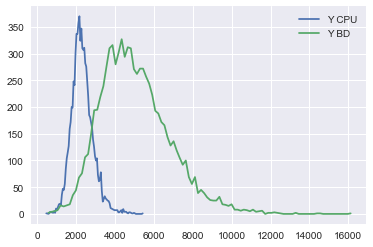

Y CPU:

Mean:			2324.27764966
Variance:		304758.662259
Standard Deviation:	552.049510695
Symmetry:		0.710104435205
Kurtosis:		1.61400137337

Y BD:

Mean:			5039.35299185
Variance:		3135127.21712
Standard Deviation:	1770.6290456
Symmetry:		0.726366906396
Kurtosis:		0.981748221161


In [24]:
import numpy as np
import pylab as p

data=Y_CPU
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="Y CPU")

data=Y_BD
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="Y BD")

p.legend(loc='upper right')

p.show()

Y_CPU2 = pd.Series(Y_CPU)

print("Y CPU:\n")
print "Mean:\t\t\t", Y_CPU2.mean()
print "Variance:\t\t", Y_CPU2.var()
print "Standard Deviation:\t", Y_CPU2.std()
print "Symmetry:\t\t", Y_CPU2.skew()
print "Kurtosis:\t\t", Y_CPU2.kurtosis()

Y_BD2 = pd.Series(Y_BD)

print
print("Y BD:\n")
print "Mean:\t\t\t", Y_BD2.mean()
print "Variance:\t\t", Y_BD2.var()
print "Standard Deviation:\t", Y_BD2.std()
print "Symmetry:\t\t", Y_BD2.skew()
print "Kurtosis:\t\t", Y_BD2.kurtosis()

Therefore we can conclude that, since kurtosis is less than 3 in both cases, they are light tailed, and we can see that they are both failry symetrical; not exactly, but enough. Another interesting fact is that while the standard deviation is roughly 23% of its mean in CPU and almost 35% in the case of DB. This shows us that the CPU variable is more consistent the than DB, which could be a relevant piece of indormation.

## Probability distribution adjustment

Due to the dificulty and lack of experience in using probability distributions in python, we decided to use XLSTAT again to fit the CPU Y and BD Y vectors.

In this section we put the values and graph we got for the following distributions:

* Exponencial
* Gamma
* Weibull 2
* Weibull 3
* Lognormal
* Pareto

In [ ]:
# Pass CPU Y and BD Y to csv files to be read by excel
Y_CPU.tofile('Y_CPU.csv',sep=',',format='%10.5f')
Y_BD.tofile('Y_BD.csv',sep=',',format='%10.5f')

## For CPU
## Exponential distribution

|Statistic|	Data|	Parameters|
| ----|
|Mean	|2324.185	|2324.934|
|Variance	|304725.697	|304823.833|
|Skewness (Pearson)|0.710|	0.475|
|Kurtosis (Pearson)	|1.613	|0.338|

Kolmogorov-Smirnov test:

D: 0.028	
p-value:	< 0.0001	
alpha:	0.05

![Gamma 2 fit distribution](gamma2.png)

## Gamma 2

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5039.353	|5036.048|
|Variance	|3135127.217	|3133071.032|
|Skewness (Pearson)|	0.726|	0.703|
|Kurtosis (Pearson)|	0.979|	0.741|

Kolmogorov-Smirnov test:

D: 0.008	
p-value:	0.594	
alpha:	0.05

![Gamma 2 fit distribution](gamma2.png)

## Weibull 2

|Statistic|	Data|	Parameters|
| ----|
|Mean	|2324.185|	2310.376|
|Variance|	304725.697|	379195.850|
|Skewness (Pearson)|	0.710|	-0.132|
|Kurtosis (Pearson)|	1.613|	-0.226|

Kolmogorov-Smirnov test:
D: 0.069	
p-value: < 0.0001	
alpha: 0.05

![Weibull 2 fit distribution](weibull2.png)

## Weibull 3

|Statistic|	Data|	Parameters|
| ----|
| Mean	|2324.185|	2324.185|
| Variance|	304725.697|	295057.687|
| Skewness (Pearson)|	0.710|	-0.082|
| Kurtosis (Pearson)|	1.613|	-0.255|

Kolmogorov-Smirnov test:

D: 0.059	
p-value: < 0.0001	
alpha:	0.05	

![Weibull 3 fit distribution](weibull3.png)

## Lognormal

| Statistic |	Data|	Parameters|
| ------ |
|Mean|	2324.185|	2325.697|
|Variance|	304725.697|	320582.598|
|Skewness (Pearson)	|0.710 |	0.745|
|Kurtosis (Pearson)	|1.613 |	1.002|

Kolmogorov-Smirnov test:

D: 0.036

p-value: < 0.0001

alpha: 0.05

![Lognormal fit distribution](lognormal.png)

## Pareto

|Statistic|	Data|	Parameters|
| ----|
|Mean	|2324.185	|573728884701.262|
|Variance|	304725.697	|86292.727|
|Skewness (Pearson)	|0.710|	2.000|
|Kurtosis (Pearson)	|1.613|	6.000|

Kolmogorov-Smirnov test:	
D:	0.000	
p-value:	1.000	
alpha:	0.05

This is an interesting case because the distribution is way off. So no line appears.

![Pareto fit distribution](pareto.png)

XLSTAT provided us we a very useful value for such fittings, the Kolmogorov-Smirnov test. After some investigation we discovered that this value is used to decide if a sample comes from a population with a specific distribution. This is true for continuous distributions, which we have!

For CPU the 3 best fittings where the Exponential, the Gamma 2 and the lognormal with d values 0.028, 0.008, and 0.036 respectively. We made the QQ plots for further analysis for those distributions.

In [ ]:
from scipy.stats import norm, expon, lognorm, gamma, weibull_min
import statsmodels.api as sm

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_CPU, expon, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Exponential QQPlot")
    plt.tight_layout()
    
    plt.show()

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_CPU, gamma, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Gamma 2 QQPlot")
    plt.tight_layout()
    
    plt.show()

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_CPU, lognorm, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Log-normal QQPlot")
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([0,2])
    axes.set_ylim([0,2])
    
    plt.show()

It is important for the reader to note that the Pareto distribution gives the D with the lowest value. However it does not correlate visually and we belive that this comes from en error in the tools used.

## For Database
## Log normal

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5039.353|	5057.947|
|Variance	|3135127.217|	3687505.544|
|Skewness (Pearson)	|0.726|	1.194|
|Kurtosis (Pearson)	|0.979|	2.636|

Kolmogorov-Smirnov test:

D: 0.025	
p-value:	< 0.0001	
alpha:	0.05

![Log normal fit distribution](lognormaldb.png)

## Weibull 2

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5039.353	|5014.704|
|Variance|	3135127.217	|3349855.894|
|Skewness (Pearson)|	0.726|	0.173|
|Kurtosis (Pearson)	|0.979|	-0.269|

Kolmogorov-Smirnov test:

D: 0.044	
p-value:	< 0.0001	
alpha:	0.05

![Weibull 2 fit distribution](weibull2db.png)

## Weibull 3

|Statistic|	Data|	Parameters|
| ----|
|Mean|	5039.353|	5039.353|
|Variance|	3135127.217	|2435772.411|
|Skewness (Pearson)|	0.726	|0.074|
|Kurtosis (Pearson)|	0.979	|-0.289|

Kolmogorov-Smirnov test:

D:	0.054	
p-value:	< 0.0001	
alpha:	0.05

![Weibull 3 fit distribution](weibull3db.png)

## Pareto

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5039.353	|579254965061.702|
|Variance	|3135127.217	|156064.120|
|Skewness (Pearson)|	0.726|	2.000|
|Kurtosis (Pearson)	|0.979	|6.000|

Kolmogorov-Smirnov test:

D: 0.000	
p-value: 	1.000	
alpha:	0.05

![Pareto fit distribution](paretodb.png)

## Exponential

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5117.023	|5117.023|
|Variance	|3219173.378|	0.000|
|Skewness (Pearson)	|0.756	|2.000|
|Kurtosis (Pearson)	|1.019|	6.000|

Kolmogorov-Smirnov test:

D:	0.353	
p-value:	< 0.0001	
alpha:	0.05

![Exponential fit distribution](exponentialdb.png)

## Gamma 2

|Statistic|	Data|	Parameters|
| ----|
|Mean	|5039.353|	5036.048|
|Variance|	3135127.217	|3133071.032|
|Skewness (Pearson)|	0.726|	0.703|
|Kurtosis (Pearson)	|0.979|	0.741|

Kolmogorov-Smirnov test:

D:	0.008	
p-value:	0.594	
alpha:	0.05

![Gamma 2 fit distribution](gamma2db.png)

Similarly, we can see that for the database the lognormal, weibull 2 y gamma 2 distributions offer the best fit according to the Kolmogorov-Smirnov test. The D values that correspond to each distribution are: 0.025, 0.044, 0.008.

Again we plot for these distributions with QQPlots.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_BD, lognorm, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Lognormal QQPlot")
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([0,10000])
    axes.set_ylim([0,10000])
    
    plt.show()

We found an outlier that greatly affects the distribution. Making this distribution infeasible for our use.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_BD, weibull_min, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Weibull 2 QQPlot")
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([0,10000])
    axes.set_ylim([0,10000])
    
    plt.show()

Again, the outlliers in the database trace make this distribution not suited for our use.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    probplot = sm.ProbPlot(Y_BD, gamma, fit=True)
    fig = probplot.qqplot(line="45")
    
    plt.title("Gamma 2 QQPlot")
    plt.tight_layout()
    
    plt.show()

These  results gave us confidence that our system behaves like a gamma probability distribution for both CPU and DB. Needless to say, the Pareto distribution failed returned dubious results. We conclude that we should treat these variables as gamma distribuited and base our future analysis in part B under the assumption that this is their behavior.